### Contents
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
    Retail price vs sales price
    Retail price (220 and higher) vs sale price
    Days since release vs sale price
    Days since release (first 6 months) vs sale price
#### 5. Regression analysis by brand  
    Retail price vs sales price
    Days since release vs sale price

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df = pd.read_excel(r"C:/Users/ruthf/OneDrive/Documents/Data Immersion/Achievement 6/Project/02 Data/1. Orignal Data/StockX_data_add_columns.xlsx")

### 2. Data Cleaning

In [4]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit,Profit %,Release Year,Sold Year,Days since release
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,877.0,3.986364,2016,2017,342
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,465.0,2.113636,2016,2017,282
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,470.0,2.136364,2016,2017,282
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,855.0,3.886364,2016,2017,282
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,608.0,2.763636,2017,2017,202


In [5]:
df.shape

(99956, 13)

In [6]:
# Check for missing values
df.isnull().sum()

Order Date            0
Brand                 0
Sneaker Name          0
Sale Price            0
Retail Price          0
Release Date          0
Shoe Size             0
Buyer Region          0
Profit                0
Profit %              0
Release Year          0
Sold Year             0
Days since release    0
dtype: int64

C:\Users\ruthf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sale Price', ylabel='Density'>

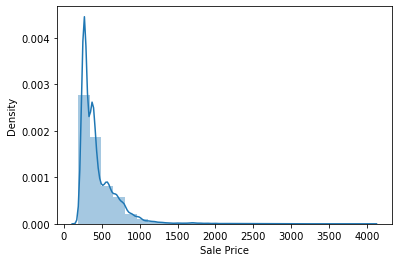

In [7]:
# Check for extreme values
sns.distplot(df['Sale Price'],bins = 25, kde = True)

In [8]:
# Check Mean
df['Sale Price'].mean()

446.6347542688783

In [9]:
# Check median
df['Sale Price'].median()

370.0

In [10]:
# Check max
df['Sale Price'].max()

4050.0

In [11]:
# Check min
df['Sale Price'].min()

186.0

In [12]:
df['Sale Price'].max()-df['Sale Price'].min()

3864.0

In [13]:
df.describe()

,Sale Price,Retail Price,Shoe Size,Profit,Profit %,Release Year,Sold Year,Days since release
count,99956.000000,99956.00000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000
mean,446.634754,208.61359,9.344181,238.021164,1.248245,2017.467246,2018.029013,183.708722
std,255.982918,25.20001,2.329588,266.133127,1.508563,0.579352,0.542357,232.354142
min,186.000000,130.00000,3.500000,-34.000000,-0.154545,2015.000000,2017.000000,-69.000000
25%,275.000000,220.00000,8.000000,58.000000,0.263636,2017.000000,2018.000000,10.000000
50%,370.000000,220.00000,9.500000,154.000000,0.704545,2017.000000,2018.000000,56.000000
75%,540.000000,220.00000,11.000000,342.000000,1.613636,2018.000000,2018.000000,345.000000
max,4050.000000,250.00000,17.000000,3860.000000,20.315789,2019.000000,2019.000000,1321.000000


### Data prep for regression analysis

#### Hypothesis 1: If a sneaker has a retail price of 220 it will sell for a low price.

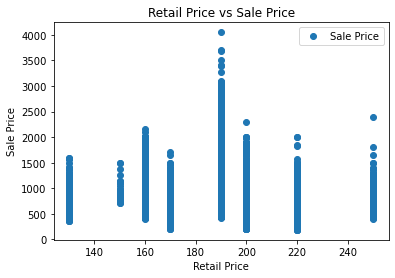

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Retail Price', y='Sale Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Retail Price vs Sale Price')  
plt.xlabel('Retail Price')  
plt.ylabel('Sale Price')  
plt.show()

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Retail Price'].values.reshape(-1,1)
y = df['Sale Price'].values.reshape(-1,1)

In [16]:
X

array([[220],
       [220],
       [220],
       ...,
       [220],
       [220],
       [220]], dtype=int64)

In [17]:
y

array([[1097.],
       [ 685.],
       [ 690.],
       ...,
       [ 605.],
       [ 650.],
       [ 640.]])

In [18]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)


### 4. Regression Analysis

In [19]:
# Create regression object
regression = LinearRegression()

In [20]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

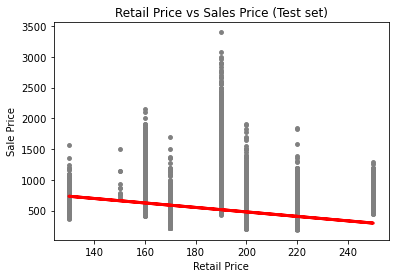

In [22]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Retail Price vs Sales Price (Test set)')
plot_test.xlabel('Retail Price')
plot_test.ylabel('Sale Price')
plot_test.show()

#### The line does not fit the data very well.  This can be seen by the distance of the data points to the line. Indicating we do not have a linear relationship between the variables.

In [23]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.6397922]]
Mean squared error:  55223.90525961011
R2 score:  0.1364535198423945


In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,249.0,405.813086
1,290.0,405.813086
2,288.0,405.813086
3,488.0,405.813086
4,549.0,296.619320
5,384.0,405.813086
6,2100.0,515.006852
7,269.0,405.813086
8,326.0,405.813086
9,252.0,405.813086


#### The summary statistics of the model confirm that the model is inaccurate.  Which can also be seen by the variance in the actual vs predicted values.  An R2 score of 0.13 indicates a very poor fit and the large MSE also confirms this.  The slope of -3.639 shows that as retail price increases sale price drops.

#### Compare how the regression fits the training set

In [26]:
# Predict on the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.6397922]]
Mean squared error:  57707.13824684011
R2 score:  0.12827932377815143


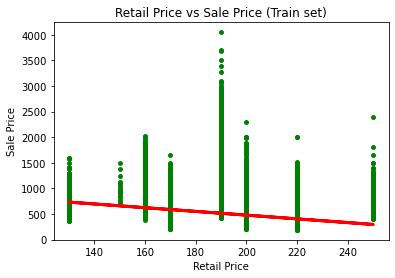

In [29]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Retail Price vs Sale Price (Train set)')
plot_test.xlabel('Retail Price')
plot_test.ylabel('Sale Price')
plot_test.show()

#### The models outcome on the training set is very similar to that on the test set.  With the MSE being even larger on the train set.  Confirming that this is not a good model to use.  This proves that the original retail price is not the driving factor of sale price. 

### Regression on df of retail price 220 and higher

In [30]:
df2 = df[df['Retail Price']>=220]
df2

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit,Profit %,Release Year,Sold Year,Days since release
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,877.0,3.986364,2016,2017,342
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,465.0,2.113636,2016,2017,282
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,470.0,2.136364,2016,2017,282
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,855.0,3.886364,2016,2017,282
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,608.0,2.763636,2017,2017,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon,345.0,1.568182,2018,2019,49
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California,378.0,1.718182,2018,2019,49
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York,385.0,1.750000,2018,2019,49
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California,430.0,1.954545,2018,2019,49


In [31]:
df2.describe()

,Sale Price,Retail Price,Shoe Size,Profit,Profit %,Release Year,Sold Year,Days since release
count,75136.000000,75136.000000,75136.000000,75136.000000,75136.000000,75136.000000,75136.000000,75136.000000
mean,368.901605,221.369117,9.247065,147.532488,0.660732,2017.348768,2018.016849,220.720094
std,145.005088,6.260955,2.376685,142.497467,0.628627,0.525513,0.554583,243.103719
min,186.000000,220.000000,3.500000,-34.000000,-0.154545,2016.000000,2017.000000,-59.000000
25%,269.000000,220.000000,8.000000,49.000000,0.222727,2017.000000,2018.000000,14.000000
50%,326.000000,220.000000,9.500000,106.000000,0.481818,2017.000000,2018.000000,82.000000
75%,410.000000,220.000000,11.000000,190.000000,0.863636,2018.000000,2018.000000,428.000000
max,2399.000000,250.000000,17.000000,2149.000000,8.596000,2018.000000,2019.000000,872.000000


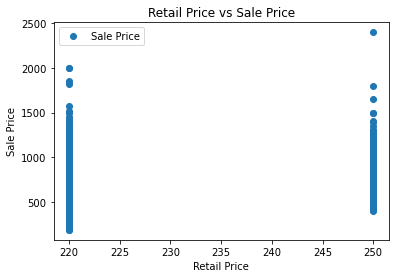

In [32]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'Retail Price', y='Sale Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Retail Price vs Sale Price')  
plt.xlabel('Retail Price')  
plt.ylabel('Sale Price')  
plt.show()

In [33]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df2['Retail Price'].values.reshape(-1,1)
y = df2['Sale Price'].values.reshape(-1,1)

In [34]:
X

array([[220],
       [220],
       [220],
       ...,
       [220],
       [220],
       [220]], dtype=int64)

In [35]:
y

array([[1097.],
       [ 685.],
       [ 690.],
       ...,
       [ 605.],
       [ 650.],
       [ 640.]])

In [36]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [37]:
### 4. Regression Analysis

# Create regression object
regression = LinearRegression()

In [38]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

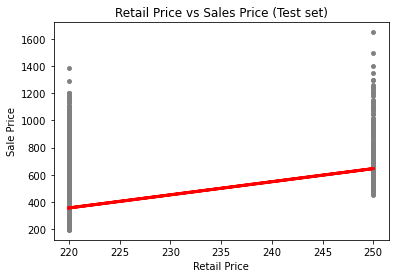

In [40]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Retail Price vs Sales Price (Test set)')
plot_test.xlabel('Retail Price')
plot_test.ylabel('Sale Price')
plot_test.show()

In [41]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [42]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.65648877]]
Mean squared error:  16860.42321492972
R2 score:  0.1790267998634808


#### When looking at retail prices of 220 and higher the slope becomes positive.  Indicating that as retail price goes up so does sale price.  However, although the MSE has come down in comparison to running on the entire df and the R2 score is slightly higher they still both indicate that the model is not a good fit.  
#### It appears that there is some other variable contributing to the fact that shoes with a retail price of 220 do not achieve a high sales price on the StockX platform. 

### Hypothesis 2:  Selling a sneaker within 6 months of release will give the highest sale price.

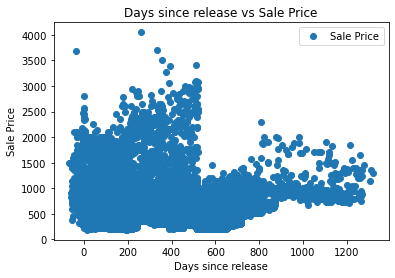

In [43]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Days since release', y='Sale Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Days since release vs Sale Price')  
plt.xlabel('Days since release')  
plt.ylabel('Sale Price')  
plt.show()

In [44]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Days since release'].values.reshape(-1,1)
y = df['Sale Price'].values.reshape(-1,1)

In [45]:
X

array([[342],
       [282],
       [282],
       ...,
       [ 49],
       [ 49],
       [ 49]], dtype=int64)

In [46]:
y

array([[1097.],
       [ 685.],
       [ 690.],
       ...,
       [ 605.],
       [ 650.],
       [ 640.]])

In [47]:
# Split data into a training set and a test set.  Using test_train_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =0)

#### Regression Analysis

In [48]:
regression.fit(X_train, y_train)

LinearRegression()

In [49]:
y_predicted = regression.predict(X_test)

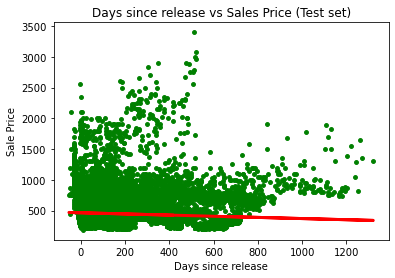

In [50]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Days since release vs Sales Price (Test set)')
plot_test.xlabel('Days since release')
plot_test.ylabel('Sale Price')
plot_test.show()

In [51]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [52]:
# Check summary stats
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.09416978]]
Mean squared error:  63439.435432583254
R2 score:  0.007985746146419448


In [53]:
# Create a dataframe comparing the actual and predicted values of y.

data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,249.0,405.813086
1,290.0,405.813086
2,288.0,405.813086
3,488.0,405.813086
4,549.0,296.619320
5,384.0,405.813086
6,2100.0,515.006852
7,269.0,405.813086
8,326.0,405.813086
9,252.0,405.813086


#### Again the model is not a good fit, the MSE is large and the R2 score is practically 0.  The slope is almost flat at -0.09 indicating no relationship between the variables.

#### Try on 6 months and less

In [54]:
df3=df[df['Days since release']<=183]

In [55]:
df3.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit,Profit %,Release Year,Sold Year,Days since release
7,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,460.0,220,2017-04-29,10.0,New York,240.0,1.090909,2017,2017,125
8,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,465.0,220,2017-04-29,11.0,Kansas,245.0,1.113636,2017,2017,125
9,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,465.0,220,2017-04-29,11.0,Florida,245.0,1.113636,2017,2017,125
10,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,515.0,220,2017-04-29,11.5,New Jersey,295.0,1.340909,2017,2017,125
11,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,473.0,220,2017-04-29,10.0,Texas,253.0,1.150000,2017,2017,125


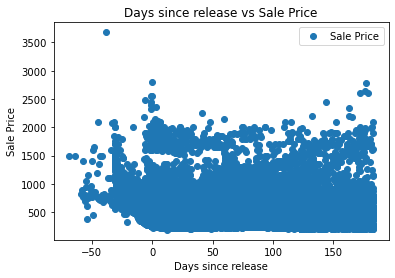

In [56]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df3.plot(x = 'Days since release', y='Sale Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Days since release vs Sale Price')  
plt.xlabel('Days since release')  
plt.ylabel('Sale Price')  
plt.show()

In [57]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df3['Days since release'].values.reshape(-1,1)
y = df3['Sale Price'].values.reshape(-1,1)

In [58]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [59]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [60]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

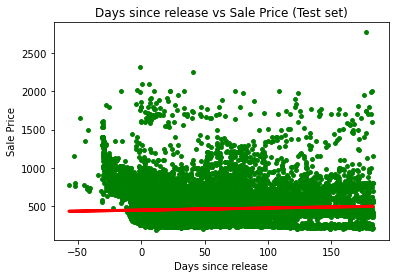

In [61]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Days since release vs Sale Price (Test set)')
plot_test.xlabel('Days since release')
plot_test.ylabel('Sale Price')
plot_test.show()

In [62]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.27089549]]
Mean squared error:  53928.03119301985
R2 score:  0.0027404708619828133


#### In the first six months after release there is a positive relationship between the variables, indicating that the sale price increases as the days since release increase.  However due to the high MSE and low R2 score, this model is not viable for making predictions.

### 5. Regression analysis by brand

In [66]:
# Create dfs by brand

yeezy = df[df['Brand']==' Yeezy']
off_white = df[df['Brand']=='Off-White']

In [64]:
yeezy.shape

(72162, 13)

In [67]:
off_white.shape

(27794, 13)

#### Retail Price vs Sale Price

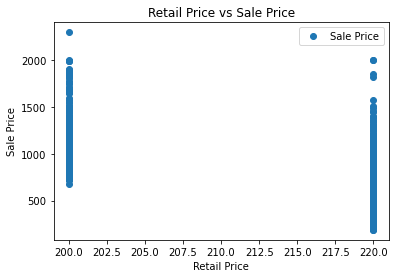

In [68]:
# Yeezy data frame
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

yeezy.plot(x = 'Retail Price', y='Sale Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Retail Price vs Sale Price')  
plt.xlabel('Retail Price')  
plt.ylabel('Sale Price')  
plt.show()

In [78]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = yeezy['Retail Price'].values.reshape(-1,1)
y = yeezy['Sale Price'].values.reshape(-1,1)

In [79]:
X

array([[220],
       [220],
       [220],
       ...,
       [220],
       [220],
       [220]], dtype=int64)

In [72]:
y

array([[1097.],
       [ 685.],
       [ 690.],
       ...,
       [ 605.],
       [ 650.],
       [ 640.]])

In [81]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [82]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [83]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

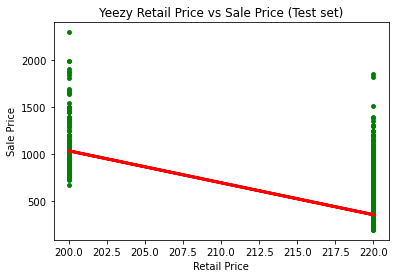

In [84]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Yeezy Retail Price vs Sale Price (Test set)')
plot_test.xlabel('Retail Price')
plot_test.ylabel('Sale Price')
plot_test.show()

In [85]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-34.01497761]]
Mean squared error:  17542.511429039427
R2 score:  0.1628441713134835


#### The negative slope here of -34.01 indicates a negative relationship between the two variables, when it comes to Yeezy sneakers.  Meaning that as the retail price rises, sale price decreases.  However, the high MSE and the low R2 score show that the linear regression model isn't a good fit and won't be viable for predicting outcomes.

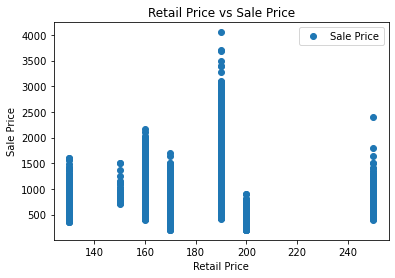

In [86]:
# Off White data frame
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

off_white.plot(x = 'Retail Price', y='Sale Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Retail Price vs Sale Price')  
plt.xlabel('Retail Price')  
plt.ylabel('Sale Price')  
plt.show()

In [87]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = off_white['Retail Price'].values.reshape(-1,1)
y = off_white['Sale Price'].values.reshape(-1,1)

In [88]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [89]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [90]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

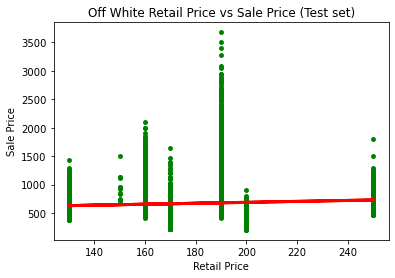

In [92]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Off White Retail Price vs Sale Price (Test set)')
plot_test.xlabel('Retail Price')
plot_test.ylabel('Sale Price')
plot_test.show()

In [93]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.83272616]]
Mean squared error:  17542.511429039427
R2 score:  0.1628441713134835


#### For Off White sneakers retail price is less of a factor when determining sale price as the slope is very small.  From performing the regression on the individual brands we can see that Yeezy is driving the negative relationship on the whole data set.

#### Days since release vs sale price

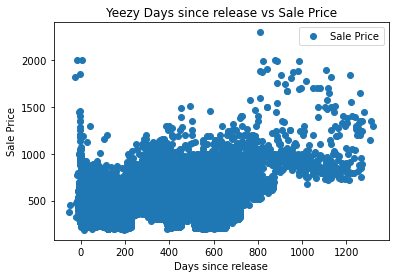

In [95]:
# Yeezy data frame
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

yeezy.plot(x = 'Days since release', y='Sale Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Yeezy Days since release vs Sale Price')  
plt.xlabel('Days since release')  
plt.ylabel('Sale Price')  
plt.show()

In [96]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = yeezy['Days since release'].values.reshape(-1,1)
y = yeezy['Sale Price'].values.reshape(-1,1)

In [97]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [98]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [99]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

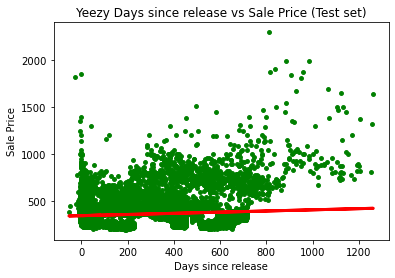

In [100]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Yeezy Days since release vs Sale Price (Test set)')
plot_test.xlabel('Days since release')
plot_test.ylabel('Sale Price')
plot_test.show()

In [101]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.06212673]]
Mean squared error:  17542.511429039427
R2 score:  0.1628441713134835


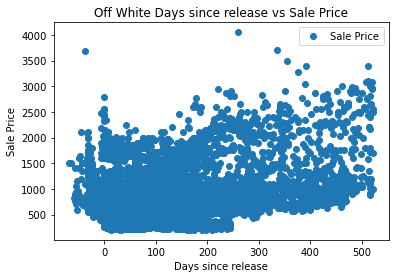

In [102]:
# Off White data frame
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

off_white.plot(x = 'Days since release', y='Sale Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Off White Days since release vs Sale Price')  
plt.xlabel('Days since release')  
plt.ylabel('Sale Price')  
plt.show()

In [103]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = off_white['Days since release'].values.reshape(-1,1)
y = off_white['Sale Price'].values.reshape(-1,1)

In [104]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [105]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [106]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

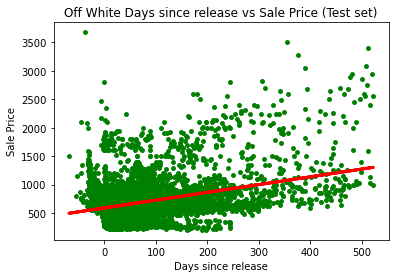

In [107]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Off White Days since release vs Sale Price (Test set)')
plot_test.xlabel('Days since release')
plot_test.ylabel('Sale Price')
plot_test.show()

In [108]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.36734492]]
Mean squared error:  17542.511429039427
R2 score:  0.1628441713134835


#### The Off White data actually shows a positive correlation between the sale price and days since release, showing that if you hold on to these sneakers they will become more valuable with time.
#### Again though the linear regression is not a good fit, but we have gained some insight.